In [27]:
import pandas as pd
import numpy as np

In [28]:
utilities = pd.read_csv("C:/Users/anime/Downloads/utility dataset update 1.csv")

marginal = pd.read_csv("C:/Users/anime/Downloads/marginal dataset update 1.csv")

In [29]:
for x in range(0, len(utilities['Utility'])):

    utilities['Utility'][x] = float(utilities['Utility'][x][1:-1])

C:\Users\anime\AppData\Local\Temp\ipykernel_37172\2409819588.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  utilities['Utility'][x] = float(utilities['Utility'][x][1:-1])
C:\Users\anime\AppData\Local\Temp\ipykernel_37172\2409819588.py:3

In [30]:
coverage = pd.read_csv("C:/Users/anime/Downloads/plays.csv")

In [31]:
coverage.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [32]:
coverage_data = pd.DataFrame()

coverage_data['Coverage Type'] = coverage['pff_passCoverage']
coverage_data['gameId'] = coverage['gameId']
coverage_data['playId'] = coverage['playId']

In [33]:
utilities = pd.merge(utilities, coverage_data, on = ['gameId', 'playId'], how = 'left')

In [34]:
utilities

,Unnamed: 0,gameId,playId,Utility,Time,Coverage Type
0,0,2022101000,110,1.045285,0.1,Cover-6 Right
1,1,2022101000,110,1.368591,1.1,Cover-6 Right
2,2,2022101000,110,11.43925,2.1,Cover-6 Right
3,3,2022101000,110,11.544642,3.1,Cover-6 Right
4,4,2022101000,110,6.011279,4.1,Cover-6 Right
...,...,...,...,...,...,...
855,855,2022100912,353,8.897691,7.1,Cover-1
856,856,2022100912,445,3.571024,0.1,Cover-3 Seam
857,857,2022100912,445,5.380279,1.1,Cover-3 Seam
858,858,2022100912,445,6.221545,2.1,Cover-3 Seam


In [35]:
utilities['Coverage Type'].unique()

array(['Cover-6 Right', 'Cover-1', 'Cover-2', 'Cover-0', 'Cover-3',
       'Quarters', 'Bracket', 'Cover 6-Left', 'Cover-1 Double',
       'Cover-3 Seam', '2-Man', 'Cover-3 Cloud Right', 'Red Zone'],
      dtype=object)

In [36]:
utilities['Time'] = np.round(utilities['Time'], 2)

In [37]:
Cover_Three_Seam = utilities[utilities['Coverage Type'] == 'Cover-3 Seam']

In [38]:
dat = utilities.groupby(utilities['Time'])

In [39]:
Cover_Three_Seam['Time'] = np.round(Cover_Three_Seam['Time'], 2)

C:\Users\anime\AppData\Local\Temp\ipykernel_37172\2635974826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cover_Three_Seam['Time'] = np.round(Cover_Three_Seam['Time'], 2)


In [40]:
utilities['Coverage Type'].unique()

array(['Cover-6 Right', 'Cover-1', 'Cover-2', 'Cover-0', 'Cover-3',
       'Quarters', 'Bracket', 'Cover 6-Left', 'Cover-1 Double',
       'Cover-3 Seam', '2-Man', 'Cover-3 Cloud Right', 'Red Zone'],
      dtype=object)

In [41]:
second_df = pd.read_csv("C:/Users/anime/Downloads/utility dataset update.csv")

In [42]:
df_list = []
for x in range(0, len(second_df['Time']), 10):

    df_list.append(second_df[second_df['Time'] == second_df['Time'][x]])

second_df = pd.concat(df_list, axis = 0)

In [45]:
utilities = pd.concat([utilities,second_df], axis = 0)

In [49]:
utilities['Coverage Type'].unique()

array(['Cover-6 Right', 'Cover-1', 'Cover-2', 'Cover-0', 'Cover-3',
       'Quarters', 'Bracket', 'Cover 6-Left', 'Cover-1 Double',
       'Cover-3 Seam', '2-Man', 'Cover-3 Cloud Right', 'Red Zone', nan],
      dtype=object)

In [58]:
utilities[utilities['Coverage Type'] == 'Cover-0']

,Unnamed: 0,gameId,playId,Utility,Time,Coverage Type
45,45,2022101000,367,1.213353,0.1,Cover-0
46,46,2022101000,367,2.06401,1.1,Cover-0
47,47,2022101000,367,3.734257,2.1,Cover-0
48,48,2022101000,367,6.48596,3.1,Cover-0
49,49,2022101000,367,9.006565,4.1,Cover-0
...,...,...,...,...,...,...
772,772,2022100913,3660,0.423282,0.1,Cover-0
773,773,2022100913,3660,4.615982,1.1,Cover-0
774,774,2022100913,3660,2.213628,2.1,Cover-0
775,775,2022100913,3660,1.850493,3.1,Cover-0


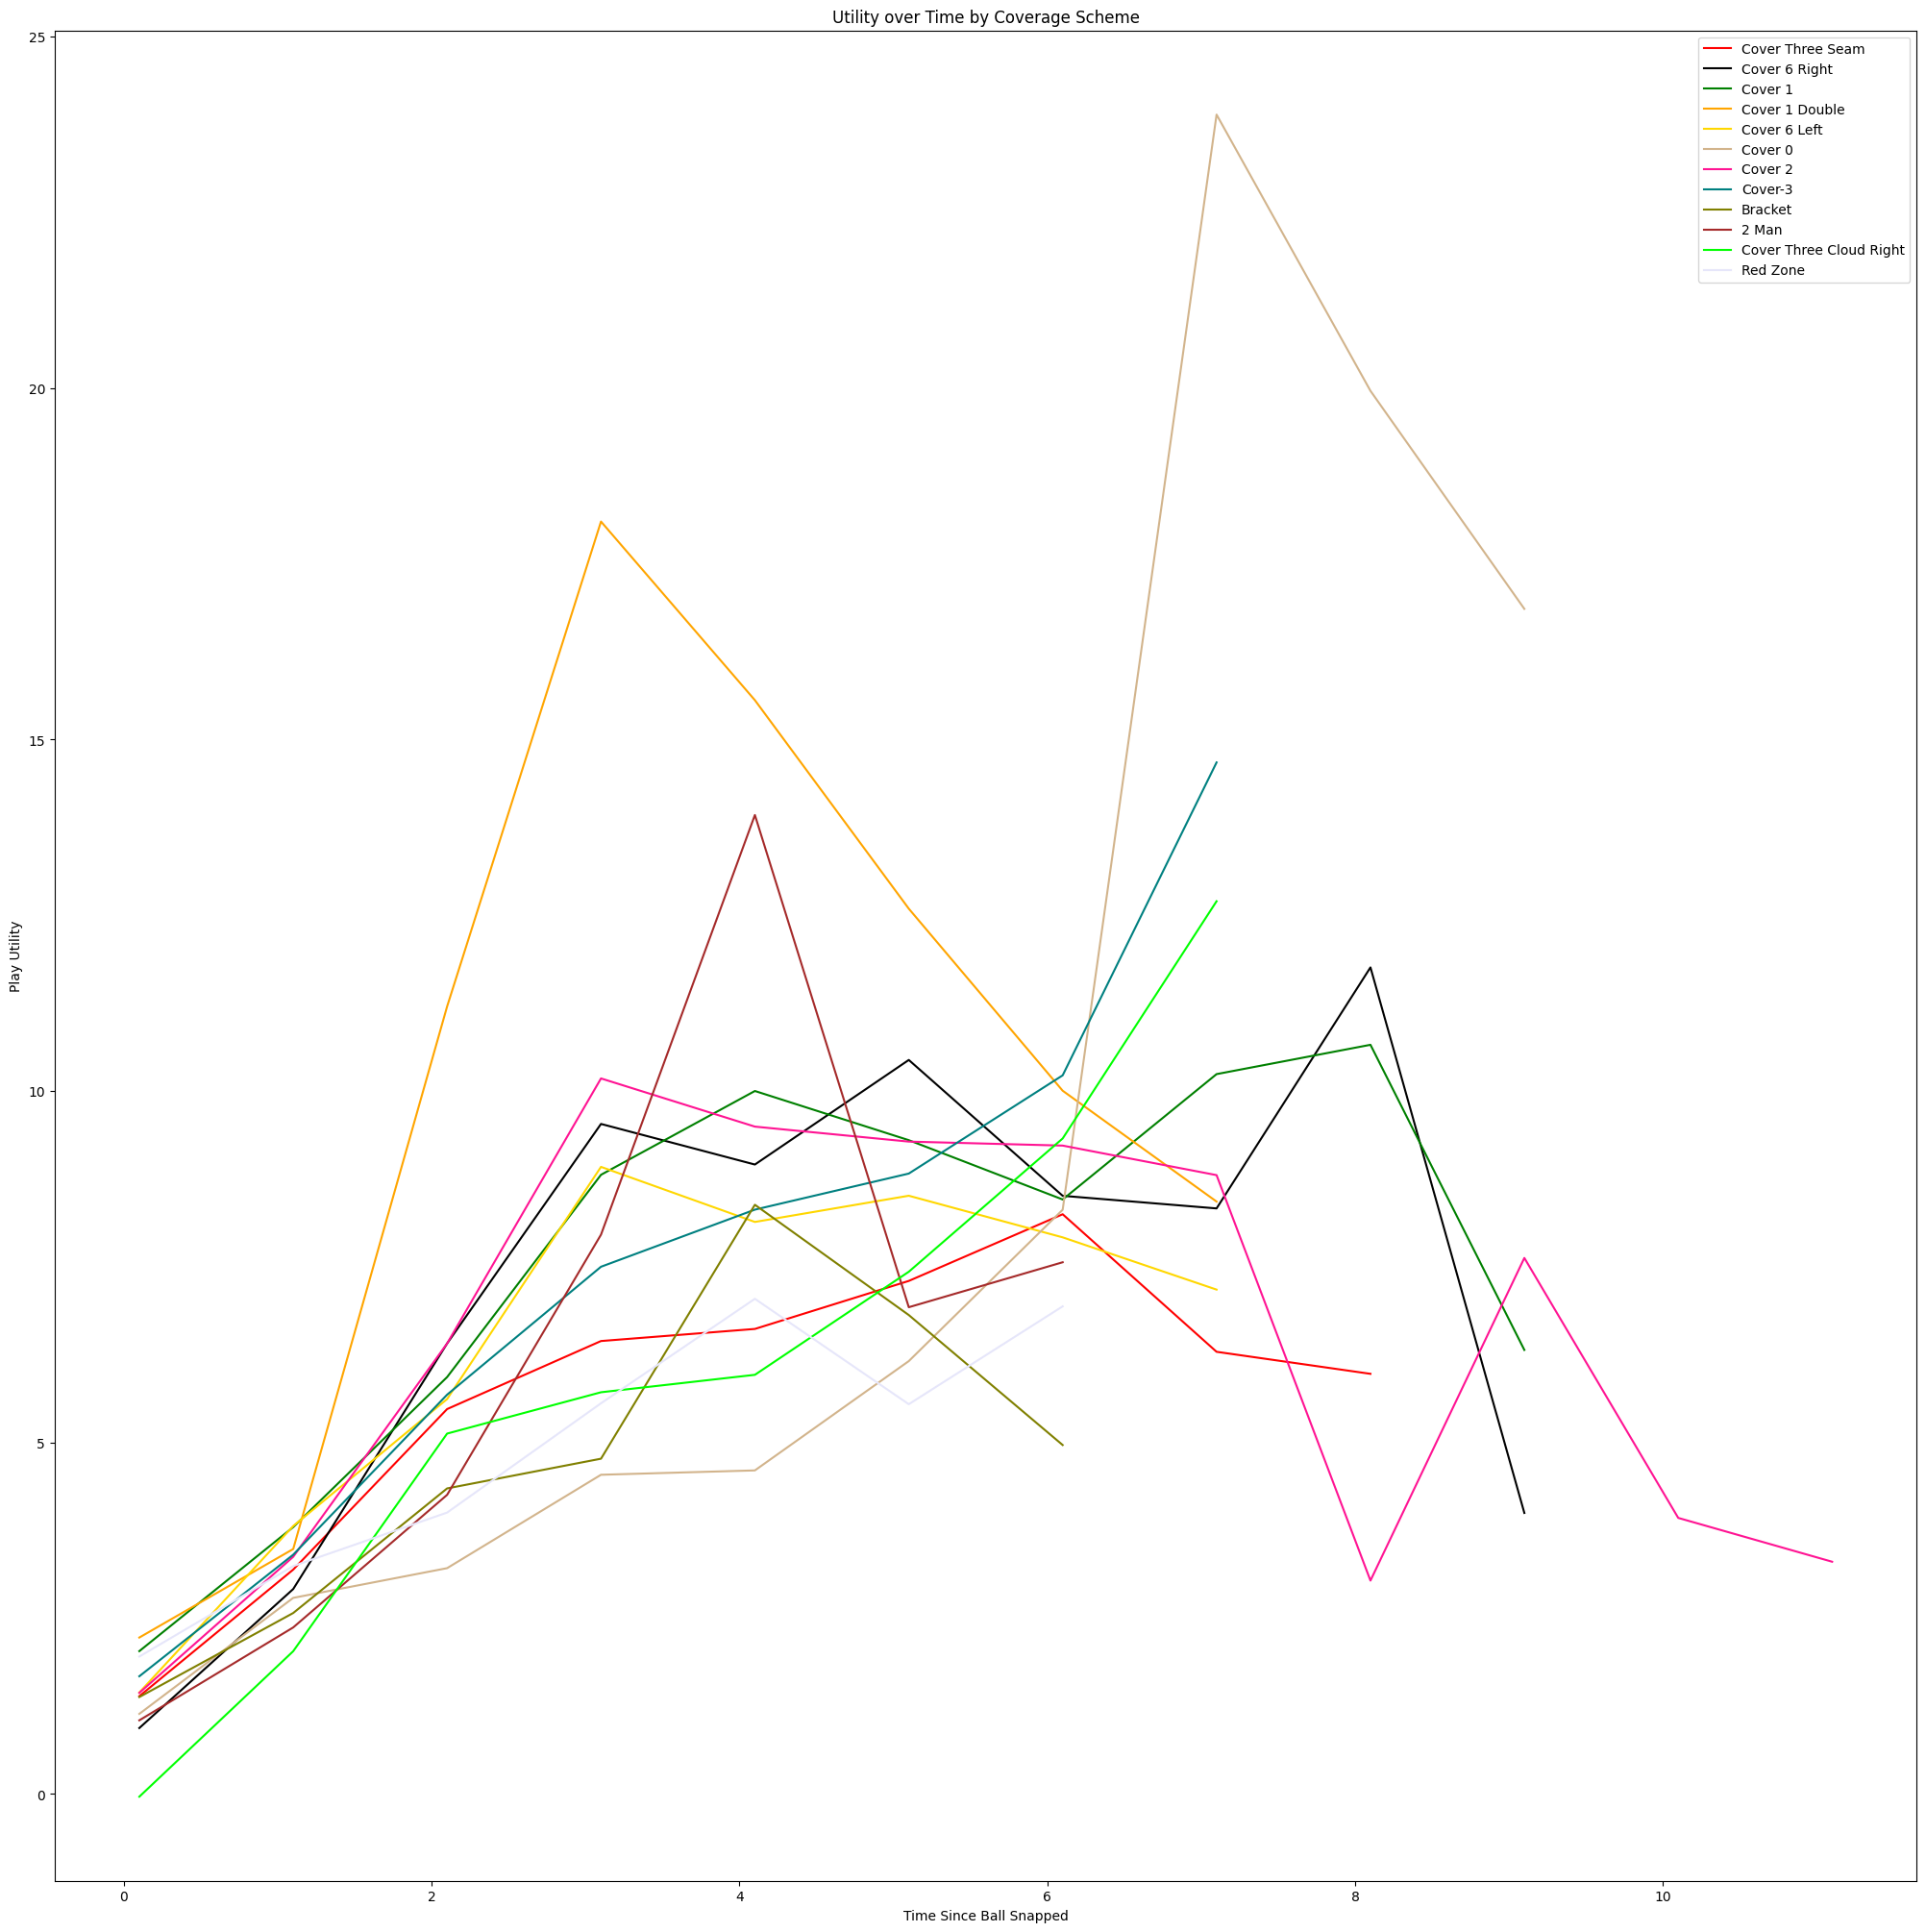

In [72]:
import matplotlib.pyplot as plt


plt.figure(figsize = (25,25))
plt.plot(Cover_Three_Seam.groupby(Cover_Three_Seam['Time'])['Utility'].mean(), 'red', label = 'Cover Three Seam')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-6 Right'].groupby(utilities[utilities['Coverage Type'] == 'Cover-6 Right']['Time'])['Utility'].mean(), 'black', label = 'Cover 6 Right')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-1'].groupby(utilities[utilities['Coverage Type'] == 'Cover-1']['Time'])['Utility'].mean(), 'green', label = 'Cover 1')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-1 Double'].groupby(utilities[utilities['Coverage Type'] == 'Cover-1 Double']['Time'])['Utility'].mean(), 'orange', label = "Cover 1 Double")

plt.plot(utilities[utilities['Coverage Type'] == 'Cover 6-Left'].groupby(utilities[utilities['Coverage Type'] == 'Cover 6-Left']['Time'])['Utility'].mean(), 'gold', label = 'Cover 6 Left')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-0'].groupby(utilities[utilities['Coverage Type'] == 'Cover-0']['Time'])['Utility'].mean(), 'tan', label = 'Cover 0')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-2'].groupby(utilities[utilities['Coverage Type'] == 'Cover-2']['Time'])['Utility'].mean(), 'deeppink', label = 'Cover 2')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-3'].groupby(utilities[utilities['Coverage Type'] == 'Cover-3']['Time'])['Utility'].mean(), 'teal', label = 'Cover-3')
plt.plot(utilities[utilities['Coverage Type'] == 'Bracket'].groupby(utilities[utilities['Coverage Type'] == 'Bracket']['Time'])['Utility'].mean(), 'olive', label = 'Bracket')

plt.plot(utilities[utilities['Coverage Type'] == '2-Man'].groupby(utilities[utilities['Coverage Type'] == '2-Man']['Time'])['Utility'].mean(), 'brown', label = '2 Man')

plt.plot(utilities[utilities['Coverage Type'] == 'Cover-3 Cloud Right'].groupby(utilities[utilities['Coverage Type'] == 'Cover-3 Cloud Right']['Time'])['Utility'].mean(), 'lime', label = 'Cover Three Cloud Right')



plt.plot(utilities[utilities['Coverage Type'] == 'Red Zone'].groupby(utilities[utilities['Coverage Type'] == 'Red Zone']['Time'])['Utility'].mean(), 'lavender', label = 'Red Zone')





plt.title('Utility over Time by Coverage Scheme')
plt.xlabel("Time Since Ball Snapped")
plt.ylabel("Play Utility")

plt.legend()


plt.show()



         2
-0.3314 x + 3.639 x + 0.1839


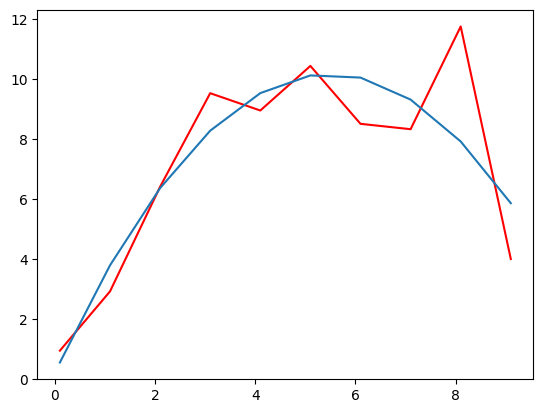

         2
-0.2507 x + 2.951 x + 1.353


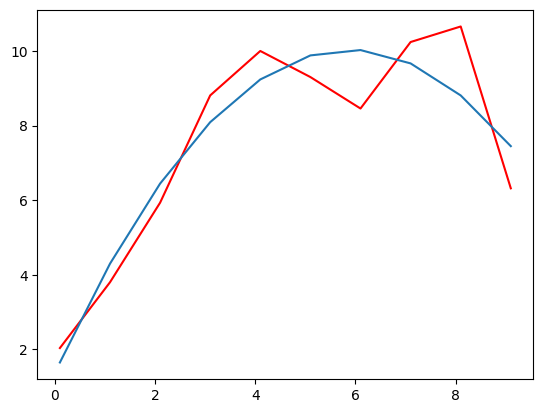

         2
-0.2361 x + 2.631 x + 1.825


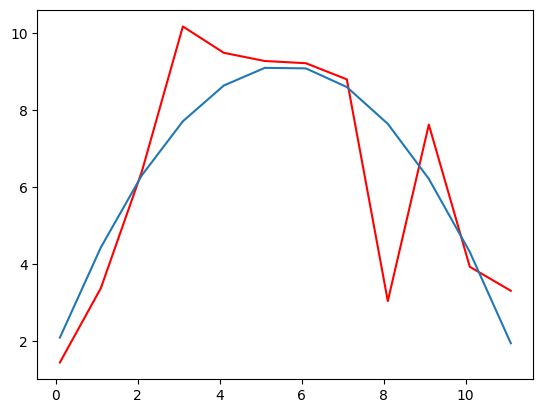

        2
0.1697 x + 0.7296 x + 0.8013


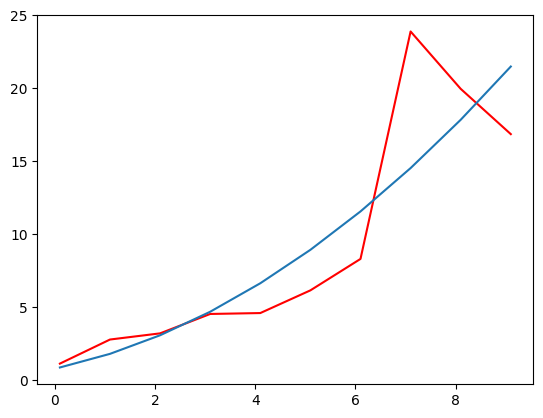

         2
0.03267 x + 1.376 x + 1.989


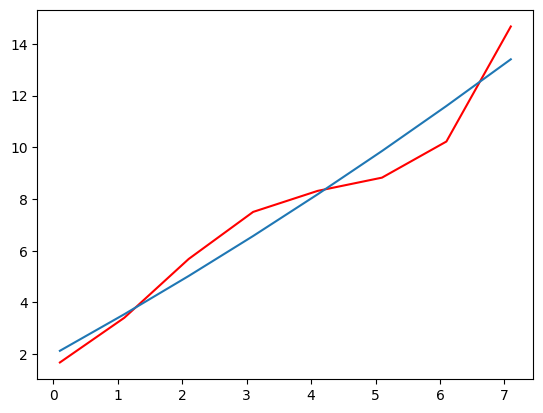

         2
-0.1943 x + 2.363 x + 1.4


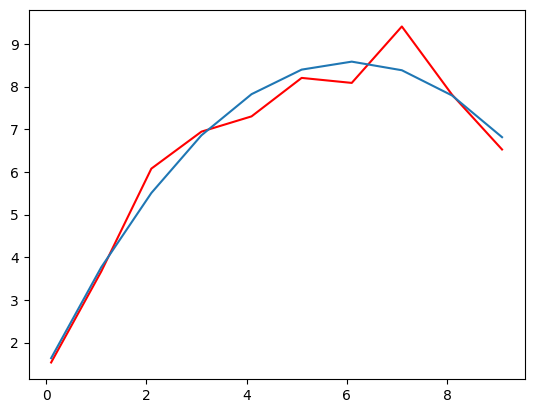

         2
-0.3041 x + 2.717 x + 0.4654


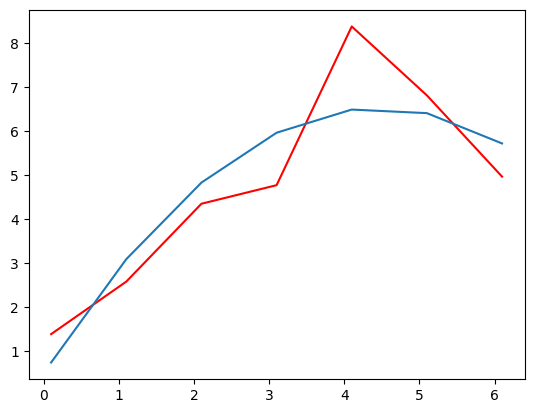

        2
-0.331 x + 3.199 x + 0.9528


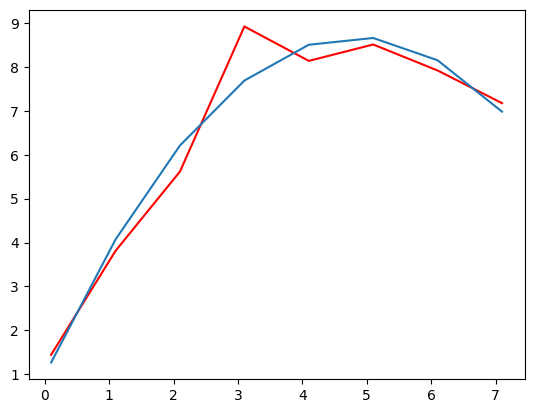

         2
-0.9026 x + 7.423 x - 0.08609


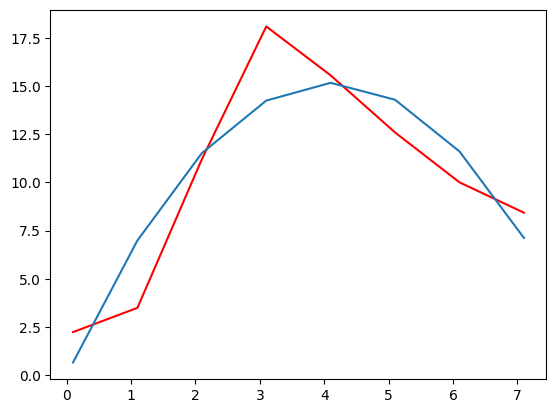

         2
-0.2197 x + 2.369 x + 1.105


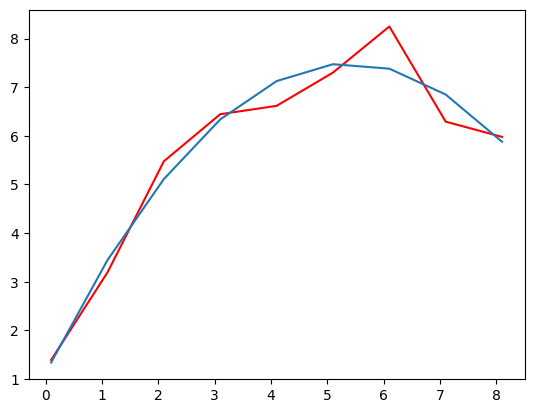

         2
-0.5156 x + 4.566 x - 0.8439


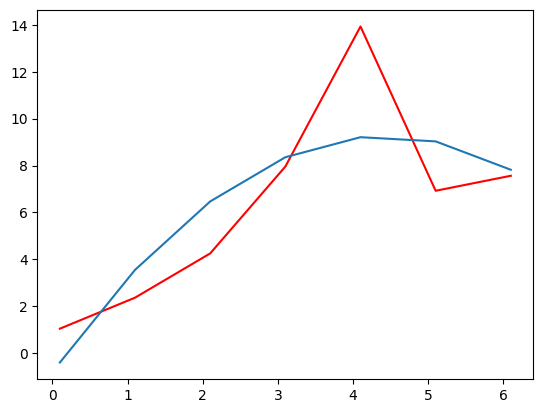

        2
0.0234 x + 1.412 x + 0.5212


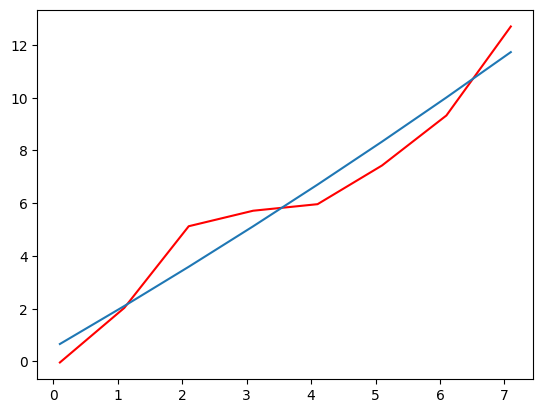

         2
-0.1299 x + 1.613 x + 1.668


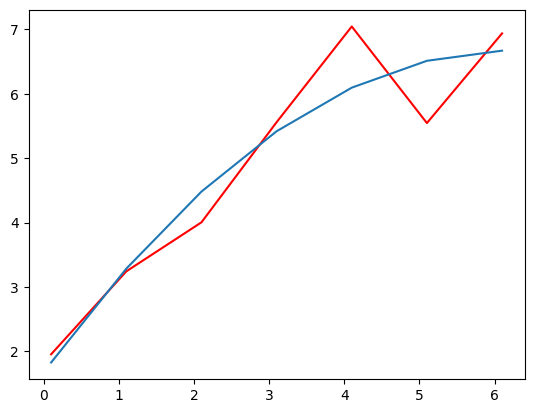

In [108]:
for x in utilities['Coverage Type'].unique()[:-1]:
    series = utilities[utilities['Coverage Type'] == x].groupby(utilities[utilities['Coverage Type'] == x]['Time'])['Utility'].mean().reset_index()


    #series_interpolate = series.interpolate()

    series['Utility']

    coefs = np.polyfit(series['Time'], pd.to_numeric(series['Utility']), deg = 2)

    p = np.poly1d(coefs)

    plt.plot(series['Time'], pd.to_numeric(series['Utility']), 'r', series['Time'], p(series['Time']))
    print(p)
    plt.show()

In [107]:
p

poly1d([-0.21973102,  2.36908988,  1.10486526])